# **CS224W - Colab 2**

In this Colab, we will construct our own graph neural network by using PyTorch Geometric (PyG) and apply the model on two of Open Graph Benchmark (OGB) datasets. Those two datasets are used to benchmark the model performance on two different graph-related tasks. One is node property prediction, predicting properties of single nodes. Another one is graph property prediction, predicting the entire graphs or subgraphs.

At first, we will learn how PyTorch Geometric stores the graphs in PyTorch tensor.

We will then load and take a quick look on one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides the data loader of the dataset but also the evaluator.

At last, we will build our own graph neural networks by using PyTorch Geometric. And then apply and evaluate the models on node property prediction and grpah property prediction tasks.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell

Have fun on Colab 2 :)

# Device
You might need to use GPU for this Colab.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

# Installation

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric
!pip install ogb

     |████████████████████████████████| 2.6MB 31.6MB/s 
     |████████████████████████████████| 1.5MB 24.5MB/s 
     |████████████████████████████████| 215kB 30.1MB/s 
     |████████████████████████████████| 235kB 46.8MB/s 
     |████████████████████████████████| 2.2MB 52.8MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=5247baa20ebbc5b35c339f7c6b3f61dca1f8906da73eb858f1b3edcbc0e0451b
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built littleutils


# 1 PyTorch Geometric (Datasets and Data)


PyTorch Geometric generally has two classes for storing or transforming the graphs into tensor format. One is the `torch_geometric.datasets`, which contains a variety of common graph datasets. Another one is `torch_geometric.data` that provides the data handling of graphs in PyTorch tensors.

In this section, we will learn how to use the `torch_geometric.datasets` and `torch_geometric.data`.

## PyG Datasets

The `torch_geometric.datasets` has many common graph datasets. Here we will explore the usage by using one example dataset.

In [ ]:
from torch_geometric.datasets import TUDataset

root = './enzymes'
name = 'ENZYMES'

# The ENZYMES dataset
pyg_dataset= TUDataset('./enzymes', 'ENZYMES')

# You can find that there are 600 graphs in this dataset
print(pyg_dataset)

Extracting enzymes/ENZYMES/ENZYMES.zip
Processing...
Done!
ENZYMES(600)


In [ ]:
dataset = pyg_dataset[100]

In [ ]:
dataset

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [ ]:
dataset.y

tensor([5])

In [ ]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

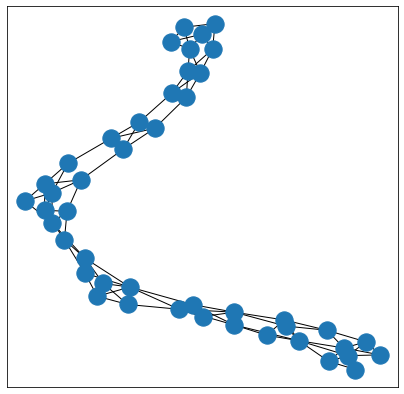

In [ ]:
from torch_geometric.utils import to_networkx
G = to_networkx(dataset, to_undirected = True)
visualize(G,color = None)

## Question 1: What is the number of classes and number of features in the ENZYMES dataset? (5 points)

In [ ]:
def get_num_classes(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  #########################################
  num_classes = pyg_dataset.num_classes
  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  #########################################
  num_features = pyg_dataset.num_features
  return num_features

# You may find that some information need to be stored in the dataset level,
# specifically if there are multiple graphs in the dataset

num_classes = get_num_classes(pyg_dataset)
num_features = get_num_features(pyg_dataset)
print("{} dataset has {} classes".format(name, num_classes))
print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset usually stores a list of `torch_geometric.data.Data` objects. Each `torch_geometric.data.Data` object usually represents a graph. You can easily get the `Data` object by indexing on the dataset.

For more information such as what will be stored in `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 2: What is the label of the graph (index 100 in the ENZYMES dataset)? (5 points)

In [ ]:
pyg_dataset[0]

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [ ]:
pyg_dataset[0].edge_index.shape[1]

168

In [ ]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the class/label 
  # of the graph (in integer).

  label = -1

  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y
  #########################################
  
  return label

# Here pyg_dataset is a dataset for graph classification
graph_0 = pyg_dataset[0]
print(graph_0)
idx = 100
label = get_graph_class(pyg_dataset, idx)
print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Graph with index 100 has label tensor([4])


## Question 3: What is the number of edges for the graph (index 200 in the ENZYMES dataset)? (5 points)

In [ ]:
pyg_dataset[200].edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,
          5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10,
         10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15,
         15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20,
         20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24,
         24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28],
        [21, 22, 23,  7, 15, 23, 24,  3,  5, 13, 26,  2,  8, 16,  8, 10, 16, 18,
          2, 13, 26, 14, 24, 25,  1, 15, 23,  3,  4, 10, 16, 18, 17, 21, 22,  4,
          8, 18, 19, 20, 28, 18, 20, 27, 28,  2,  5, 26,  6, 24, 25, 26,  1,  7,
         23,  3,  4,  8,  9, 21, 22,  4,  8, 10, 12, 11, 20, 28, 11, 12, 19, 27,
         28,  0,  9, 17, 22,  0,  9, 17, 21, 23,  0,  1,  7, 15, 22,  1,  6, 14,
         25,  6, 14, 24,  2,  5, 13, 14, 12, 20, 28, 11, 12, 19, 20, 27]])

In [ ]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the number of 
  # edges in the graph (in integer). You should not count an edge 
  # twice if the graph is undirected. For example, in an undirected 
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## (~4 lines of code)
  num_edges = int(pyg_dataset[200].edge_index.shape[1]/2)
  #########################################
  
  return num_edges

idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


# 2 Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can also be evaluated by using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports the PyG dataset and data. Here we take a look on the `ogbn-arxiv` dataset.

In [ ]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
# Load the dataset and transform it to sparse tensor
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

  0%|          | 0/81 [00:00<?, ?it/s]

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:07<00:00, 10.59it/s]


Extracting dataset/arxiv.zip
Processing...
Loading necessary files...
This might take a while.


100%|██████████| 1/1 [00:00<00:00, 107.29it/s]

Processing graphs...
Converting graphs into PyG objects...
Saving...
Done!


The ogbn-arxiv dataset has 1 graph
Data(adj_t=[169343, 169343, nnz=1166243], node_year=[169343, 1], x=[169343, 128], y=[169343, 1])


In [ ]:
data.num_features

128

## Question 4: What is the number of features in the ogbn-arxiv graph? (5 points)

In [ ]:
def graph_num_features(data):
  # TODO: Implement this function that takes a PyG data object,
  # and returns the number of features in the graph (in integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  # num_features =  data.num_features
  num_features = data.x.shape[1]
  #########################################

  return num_features

num_features = graph_num_features(data)
print('The graph has {} features'.format(num_features))

The graph has 128 features


# 3 GNN: Node Property Prediction

In this section we will build our first graph neural network by using PyTorch Geometric and apply it on node property prediction (node classification).

We will build the graph neural network by using GCN operator ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)).

You should use the PyG built-in `GCNConv` layer directly. 

## Setup

In [ ]:
import torch
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

1.8.1+cu101


In [ ]:
data.adj_t

SparseTensor(row=tensor([     0,      0,      0,  ..., 169341, 169342, 169342], device='cuda:0'),
             col=tensor([   411,    640,   1162,  ..., 163274,  27824, 158981], device='cuda:0'),
             size=(169343, 169343), nnz=2315598, density=0.01%)

In [ ]:
dataset.data

Data(edge_index=[2, 1166243], node_year=[169343, 1], x=[169343, 128], y=[169343, 1])

## Load and Preprocess the Dataset

In [ ]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
data = dataset[0]

# Make the adjacency matrix to symmetric
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

data = data.to(device)
split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

Device: cuda


In [ ]:
data

Data(adj_t=[169343, 169343, nnz=2315598], node_year=[169343, 1], x=[169343, 128], y=[169343, 1])

In [ ]:
split_idx

{'test': tensor([   346,    398,    451,  ..., 169340, 169341, 169342]),
 'train': tensor([     0,      1,      2,  ..., 169145, 169148, 169251]),
 'valid': tensor([   349,    357,    366,  ..., 169185, 169261, 169296])}

In [ ]:
data.y

tensor([[ 4],
        [ 5],
        [28],
        ...,
        [10],
        [ 4],
        [ 1]], device='cuda:0')

## GCN Model

Now we will implement our GCN model!

Please follow the figure below to implement your `forward` function.


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [ ]:
import torch.nn as nn 

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement this function that initializes self.convs, 
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None
        
        self.num_layers = num_layers

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and 
        ## 'out_channels'. More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## More information please refer to the documentation: 
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        
        self.convs = nn.ModuleList([GCNConv(input_dim, hidden_dim)])
        self.convs.extend([GCNConv(hidden_dim, hidden_dim) for i in range(num_layers-2)])
        self.convs.extend([GCNConv(hidden_dim, output_dim)])
        
        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for i in range(num_layers-1)])
        
        self.softmax = nn.LogSoftmax(dim=1)
        
        #########################################

        # Probability of an element to be zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement this function that takes the feature tensor x,
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as showing in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## More information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        for i in range(self.num_layers):
            
            # Last Conv layer pass
            if (i == self.num_layers-1):
                x = self.convs[i](x, adj_t)
                if (self.return_embeds):
                    return x
                x = self.softmax(x)
                out = x
                
            else:
                x = self.convs[i](x, adj_t)
                x = self.bns[i](x)
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        #########################################

        return out

In [ ]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement this function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slicing the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    loss = loss_fn(out[train_idx], data.y[train_idx].squeeze(1))

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [ ]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator):
    # TODO: Implement this function that tests the model by 
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out = model(data.x, data.adj_t)
    

    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    return train_acc, valid_acc, test_acc

In [ ]:
# Please do not change the args
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

{'device': 'cuda',
 'dropout': 0.5,
 'epochs': 100,
 'hidden_dim': 256,
 'lr': 0.01,
 'num_layers': 3}

In [ ]:
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [ ]:
import copy

# reset the parameters to initial random value
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, data, train_idx, optimizer, loss_fn)
    result = test(model, data, split_idx, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 4.1057, Train: 24.23%, Valid: 28.12% Test: 25.29%
Epoch: 02, Loss: 2.3042, Train: 24.31%, Valid: 21.88% Test: 27.25%
Epoch: 03, Loss: 1.9981, Train: 27.40%, Valid: 31.86% Test: 35.14%
Epoch: 04, Loss: 1.8041, Train: 31.94%, Valid: 32.83% Test: 29.57%
Epoch: 05, Loss: 1.6871, Train: 39.00%, Valid: 37.24% Test: 33.74%
Epoch: 06, Loss: 1.6105, Train: 44.79%, Valid: 42.59% Test: 42.09%
Epoch: 07, Loss: 1.5348, Train: 44.53%, Valid: 41.37% Test: 41.58%
Epoch: 08, Loss: 1.4645, Train: 41.51%, Valid: 37.94% Test: 37.87%
Epoch: 09, Loss: 1.4200, Train: 35.72%, Valid: 30.42% Test: 29.82%
Epoch: 10, Loss: 1.3813, Train: 31.34%, Valid: 24.41% Test: 23.53%
Epoch: 11, Loss: 1.3432, Train: 29.68%, Valid: 21.85% Test: 21.02%
Epoch: 12, Loss: 1.3158, Train: 30.96%, Valid: 23.39% Test: 23.18%
Epoch: 13, Loss: 1.2942, Train: 34.88%, Valid: 30.57% Test: 33.53%
Epoch: 14, Loss: 1.2749, Train: 39.12%, Valid: 37.28% Test: 41.13%
Epoch: 15, Loss: 1.2547, Train: 43.23%, Valid: 42.22% Test: 45

In [ ]:
best_result = test(best_model, data, split_idx, evaluator)
train_acc, valid_acc, test_acc = best_result
print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Best model: Train: 73.84%, Valid: 71.97% Test: 70.97%


## Question 5: What are your `best_model` validation and test accuracy? Please report them on Gradescope. For example, for an accuracy such as 50.01%, just report 50.01 and please don't include the percent sign. (20 points)

# 4 GNN: Graph Property Prediction

In this section we will create a graph neural network for graph property prediction (graph classification)


## Load and preprocess the dataset

In [ ]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm

# Load the dataset 
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

split_idx = dataset.get_idx_split()

# Check task type
print('Task type: {}'.format(dataset.task_type))

Device: cuda
Task type: binary classification


In [ ]:
dataset.data

Data(edge_attr=[2259376, 3], edge_index=[2, 2259376], x=[1049163, 9], y=[41127, 1])

In [ ]:
dataset[35000]

Data(edge_attr=[48, 3], edge_index=[2, 48], x=[21, 9], y=[1, 1])

In [ ]:
dataset[35000].num_nodes

21

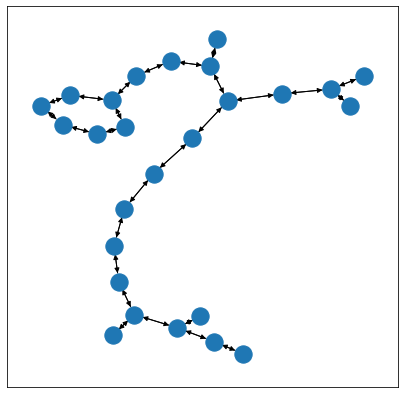

In [ ]:
from torch_geometric.utils import to_networkx
G = to_networkx(dataset[20000], to_undirected=False)
visualize(G, color=None)

In [ ]:
# Load the data sets into dataloader
# We will train the graph classification task on a batch of 32 graphs
# Shuffle the order of graphs for training set
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

In [ ]:
# Please do not change the args
args = {
    'device': device,
    'num_layers': 5,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cuda',
 'dropout': 0.5,
 'epochs': 30,
 'hidden_dim': 256,
 'lr': 0.001,
 'num_layers': 5}

## Graph Prediction Model

Now we will implement our GCN Graph Prediction model!

We will reuse the existing GCN model to generate `node_embeddings` and use  Global Pooling on the nodes to predict properties for the whole graph.

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout,pool):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = None

        ############# Your code here ############
        ## Note:
        ## 1. Initialize the self.pool to global mean pooling layer
        ## More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## (~1 line of code)
        self.pool = pool
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
        self.gnn_node.reset_parameters()
        self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement this function that takes the input tensor batched_data,
        # returns a batched output tensor for each graph.
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using existing GCN model
        ## 2. Use global pooling layer to construct features for the whole graph
        ## More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict the graph property 
        ## (~3 lines of code)
        out = self.gnn_node(embed, edge_index)
        out = self.pool(out, batch)
        out = self.linear(out)
        #########################################

        return out

In [ ]:
def train(model, device, data_loader, optimizer, loss_fn):
    # TODO: Implement this function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        ############# Your code here ############
        ## Note:
        ## 1. Zero grad the optimizer
        ## 2. Feed the data into the model
        ## 3. Use `is_labeled` mask to filter output and labels
        ## 4. You might change the type of label
        ## 5. Feed the output and label to loss_fn
        ## (~3 lines of code)
        optimizer.zero_grad()
        out = model(batch)
            
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].type_as(out))
        #########################################

        loss.backward()
        optimizer.step()

    return loss.item()

In [ ]:
# The evaluation function
def eval(model, device, loader, evaluator):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    return evaluator.eval(input_dict)

In [ ]:
model = GCN_Graph(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout'], global_mean_pool).to(device)
evaluator = Evaluator(name='ogbg-molhiv')

In [ ]:
import copy

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  print('Training...')
  loss = train(model, device, train_loader, optimizer, loss_fn)

  print('Evaluating...')
  train_result = eval(model, device, train_loader, evaluator)
  val_result = eval(model, device, valid_loader, evaluator)
  test_result = eval(model, device, test_loader, evaluator)

  train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Training...



Evaluating...



Epoch: 01, Loss: 0.0580, Train: 70.72%, Valid: 73.07% Test: 73.92%
Training...



Evaluating...



Epoch: 02, Loss: 0.0301, Train: 75.64%, Valid: 69.75% Test: 71.27%
Training...



Evaluating...



Epoch: 03, Loss: 0.0287, Train: 75.88%, Valid: 77.55% Test: 68.04%
Training...



Evaluating...



Epoch: 04, Loss: 0.0418, Train: 77.13%, Valid: 74.58% Test: 70.67%
Training...



Evaluating...



Epoch: 05, Loss: 1.1896, Train: 76.44%, Valid: 71.93% Test: 73.94%
Training...



Evaluating...



Epoch: 06, Loss: 0.0302, Train: 77.48%, Valid: 77.39% Test: 67.85%
Training...



Evaluating...



Epoch: 07, Loss: 0.8681, Train: 78.80%, Valid: 72.18% Test: 68.19%
Training...



Evaluating...



Epoch: 08, Loss: 0.0432, Train: 79.33%, Valid: 71.64% Test: 72.07%
Training...



Evaluating...



Epoch: 09, Loss: 0.4390, Train: 80.50%, Valid: 77.51% Test: 70.72%
Training...



Evaluating...



Epoch: 10, Loss: 0.0251, Train: 80.57%, Valid: 76.81% Test: 73.98%
Training...



Evaluating...



Epoch: 11, Loss: 0.0382, Train: 81.13%, Valid: 75.97% Test: 73.50%
Training...



Evaluating...



Epoch: 12, Loss: 0.0302, Train: 80.13%, Valid: 76.07% Test: 73.99%
Training...



Evaluating...



Epoch: 13, Loss: 0.0588, Train: 81.28%, Valid: 76.80% Test: 73.91%
Training...



Evaluating...



Epoch: 14, Loss: 0.0344, Train: 80.80%, Valid: 74.80% Test: 71.89%
Training...



Evaluating...



Epoch: 15, Loss: 0.0389, Train: 81.88%, Valid: 78.05% Test: 72.64%
Training...



Evaluating...



Epoch: 16, Loss: 0.0207, Train: 81.57%, Valid: 77.76% Test: 73.38%
Training...



Evaluating...



Epoch: 17, Loss: 0.0275, Train: 81.62%, Valid: 73.87% Test: 73.84%
Training...



Evaluating...



Epoch: 18, Loss: 0.0302, Train: 81.81%, Valid: 77.14% Test: 68.69%
Training...



Evaluating...



Epoch: 19, Loss: 0.0288, Train: 82.33%, Valid: 77.00% Test: 73.19%
Training...



Evaluating...



Epoch: 20, Loss: 0.0146, Train: 82.60%, Valid: 78.35% Test: 72.22%
Training...



Evaluating...



Epoch: 21, Loss: 0.0180, Train: 82.85%, Valid: 77.13% Test: 73.74%
Training...



Evaluating...



Epoch: 22, Loss: 0.0328, Train: 82.28%, Valid: 79.87% Test: 73.62%
Training...



Evaluating...



Epoch: 23, Loss: 0.0220, Train: 82.80%, Valid: 76.98% Test: 74.80%
Training...



Evaluating...



Epoch: 24, Loss: 0.0292, Train: 83.32%, Valid: 77.53% Test: 75.96%
Training...



Evaluating...



Epoch: 25, Loss: 0.0270, Train: 83.29%, Valid: 78.44% Test: 71.72%
Training...



Evaluating...



Epoch: 26, Loss: 0.3149, Train: 83.56%, Valid: 75.77% Test: 73.78%
Training...



Evaluating...



Epoch: 27, Loss: 0.0549, Train: 83.43%, Valid: 79.06% Test: 74.71%
Training...



Evaluating...



Epoch: 28, Loss: 0.0272, Train: 84.15%, Valid: 78.93% Test: 75.10%
Training...



Evaluating...



Epoch: 29, Loss: 0.0175, Train: 83.66%, Valid: 77.67% Test: 75.04%
Training...



Evaluating...



Epoch: 30, Loss: 0.0278, Train: 84.62%, Valid: 80.40% Test: 75.07%


In [ ]:
train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')


Best model: Train: 84.62%, Valid: 80.40% Test: 75.07%


## Question 6: What are your `best_model` validation and test ROC-AUC score? Please report them on Gradescope. For example, for an ROC-AUC score such as 50.01%, just report 50.01 and please don't include the percent sign. (20 points)

In [ ]:
from torch_geometric.nn import global_add_pool

## Question 7 (Optional): Experiment with other two global pooling layers other than mean pooling in Pytorch Geometric.

In [ ]:
model = GCN_Graph(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout'], global_add_pool).to(device)
evaluator = Evaluator(name='ogbg-molhiv')

In [ ]:
import copy

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
    print('Training...')
    loss = train(model, device, train_loader, optimizer, loss_fn)

    print('Evaluating...')
    train_result = eval(model, device, train_loader, evaluator)
    val_result = eval(model, device, valid_loader, evaluator)
    test_result = eval(model, device, test_loader, evaluator)

    train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

In [ ]:
train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

# Submission

In order to get credit, you must go submit your answers on Gradescope.

Also, you need to submit the `ipynb` file of Colab 2, by clicking `File` and `Download .ipynb`. Please make sure that your output of each cell is available in your `ipynb` file.